### Import Libraries

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


### Add noise to train and test data

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11493376/11490434 [==============================] - 0s 0us/step


### Plot Noisy dataset

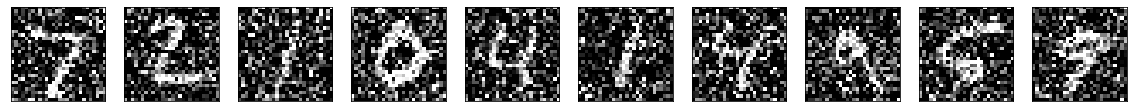

In [3]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Create  Model

In [4]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

### Train model

In [5]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 185us/step - loss: 0.1669 - val_loss: 0.1162
Epoch 2/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1131 - val_loss: 0.1082
Epoch 3/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1074 - val_loss: 0.1044
Epoch 4/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1043 - val_loss: 0.1021
Epoch 5/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1024 - val_loss: 0.1009
Epoch 6/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1010 - val_loss: 0.1005
Epoch 7/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.1001 - val_loss: 0.0991
Epoch 8/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0994 - val_loss: 0.0982
Epoch 9/100
60000/60000 [==============================] - 5s 76us/step - loss: 0.0988 - val_loss: 0

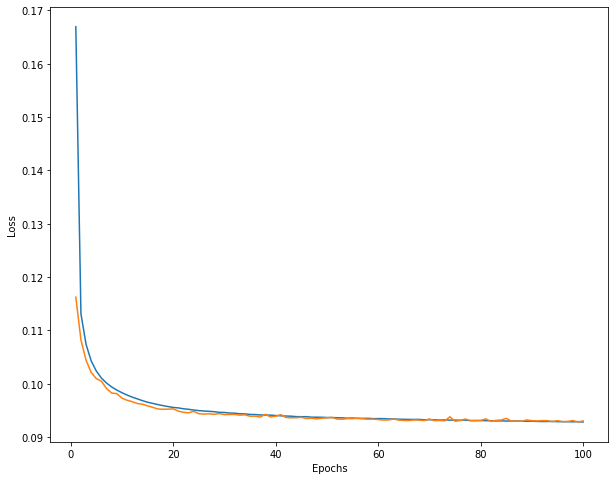

In [6]:
epochs = 100
plt.figure(figsize=(10, 8))
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['loss'])
plt.plot(np.arange(1, epochs + 1), autoencoder.history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Plot noisy and reconstructed image

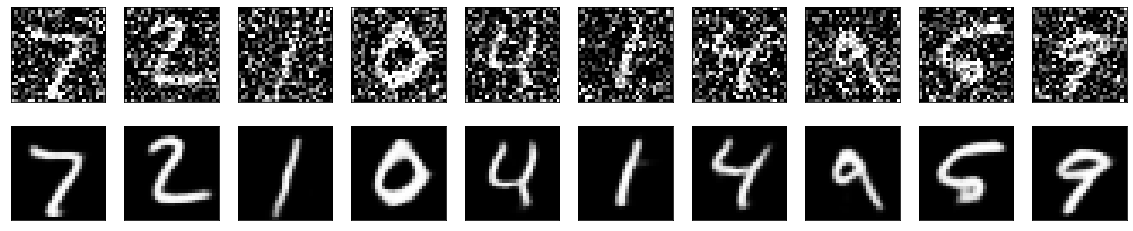

In [7]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()